### Importing relevant libraries

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [43]:
# setting few options 
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

### Loading the data

In [55]:
medical_data = pd.read_csv('medical_examination.csv')
medical_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [45]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [69]:
# Good practice to work with a copy of the original data
med_data_copy = medical_data.copy()

##### Q1. Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [70]:
# Let's remember that we need to convert the height(cm) to m
med_data_copy['height'] = med_data_copy['height'] / 100

In [71]:
# the overweight column is created thus:
med_data_copy['overweight'] = med_data_copy['weight'] / ( med_data_copy['height'] * med_data_copy['height'])

In [72]:
def f(x):
    if x['overweight'] > 25: return 1
    else: return 0

med_data_copy['overweight'] = med_data_copy.apply(f, axis=1)



In [73]:
med_data_copy.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,0


In [74]:
med_data_copy.overweight.dtype

# 1: overweight
# 0: Not overweight

dtype('int64')

##### Q2. Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [54]:
# let's reveiw the cholesterol and gluc columns
med_data_copy['cholesterol'].unique(), med_data_copy['gluc'].unique()

(array([1, 3, 2], dtype=int64), array([1, 2, 3], dtype=int64))

In [86]:
# I will use the np.where clause to achieve this
# med_data_copy.head()

med_data_copy['cholesterol'] = np.where(med_data_copy['cholesterol'].values == 1, 0, 1)

In [87]:
med_data_copy.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,1,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,1,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,1,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,1,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,1,0,0,0,0,0


In [88]:
med_data_copy['gluc'] = np.where(med_data_copy['gluc'].values == 1, 0, 1)

In [90]:
med_data_copy.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0


Q3. Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value.

In [144]:
data_for_chart = med_data_copy.iloc[:,7:13]
data_for_chart

,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,0,0,1,0
1,1,0,0,0,1,1
2,1,0,0,0,0,1
3,0,0,0,0,1,1
4,0,0,0,0,0,0
...,...,...,...,...,...,...
69995,0,0,1,0,1,0
69996,1,1,0,0,1,1
69997,1,0,0,1,0,1
69998,0,1,0,0,0,1


In [166]:
df_count = data_for_chart.groupby(["cardio", "cholesterol", "gluc", "alco", "smoke", "active"]).size().rename('total').reset_index()
df_count

,cardio,cholesterol,gluc,alco,smoke,active,total
0,0,0,0,0,0,0,4550
1,0,0,0,0,0,1,19867
2,0,0,0,0,1,0,245
3,0,0,0,0,1,1,1455
4,0,0,0,1,0,0,94
...,...,...,...,...,...,...,...
59,1,1,1,0,1,1,216
60,1,1,1,1,0,0,30
61,1,1,1,1,0,1,163
62,1,1,1,1,1,0,27


In [167]:
# chage the data to long format using melt() function.
df_count.melt(['total', 'cardio'])

,total,cardio,variable,value
0,4550,0,cholesterol,0
1,19867,0,cholesterol,0
2,245,0,cholesterol,0
3,1455,0,cholesterol,0
4,94,0,cholesterol,0
...,...,...,...,...
315,216,1,active,1
316,30,1,active,0
317,163,1,active,1
318,27,1,active,0


In [150]:
df_cat = med_data_copy.groupby(["cardio", "cholesterol", "gluc", "alco", "smoke", "active"]).size().rename("total").reset_index().melt(['total', 'cardio'])

In [151]:
df_cat

,total,cardio,variable,value
0,4550,0,cholesterol,0
1,19867,0,cholesterol,0
2,245,0,cholesterol,0
3,1455,0,cholesterol,0
4,94,0,cholesterol,0
...,...,...,...,...
315,216,1,active,1
316,30,1,active,0
317,163,1,active,1
318,27,1,active,0


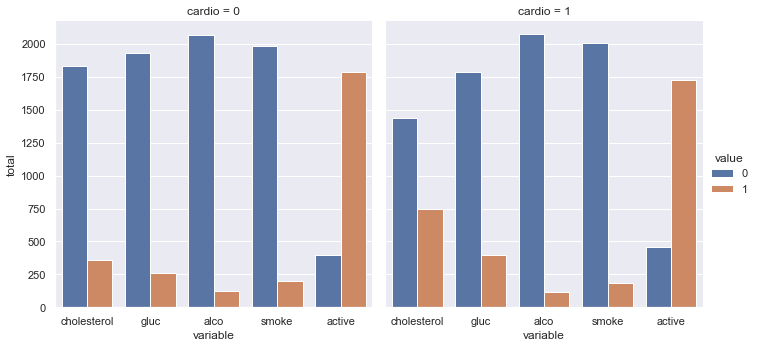

In [170]:
sns.catplot(data = df_cat, x='variable', y='total', hue='value', col='cardio', kind="bar", ci = None)

In [171]:
# exercise = sns.load_dataset('exercise')
g = sns.catplot(data= df_count, x='variable', y='total', hue='value', col='cardio', kind='bar', ci=None )

ValueError: Could not interpret input 'variable'

#### Clean the data. Filter out the following patient segments that represent incorrect data:

(i) diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))

In [175]:
med_data_copy.shape

(70000, 14)

In [195]:
filtered_data = med_data_copy.loc[med_data_copy['ap_hi'] >= med_data_copy['ap_lo']]

In [196]:
filtered_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,1.68,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,1.58,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,1.83,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,1.63,72.0,135,80,0,1,0,0,0,1,1


(ii) height is less than the 2.5th percentile (Keep the correct data with 
(df['height'] >= df['height'].quantile(0.025))
)

In [198]:
filtered_data = filtered_data.loc[filtered_data['height'] >= filtered_data['height'].quantile(0.025) ]
filtered_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,1.68,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,1.58,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,1.83,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,1.63,72.0,135,80,0,1,0,0,0,1,1


(iii) height is more than the 97.5th percentile

In [201]:
filtered_data = filtered_data.loc[filtered_data['height'] < filtered_data['height'].quantile(0.975) ]
filtered_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,1.65,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,1.68,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,1.58,126.0,140,90,1,1,0,0,1,1,1
69998,99998,22431,1,1.63,72.0,135,80,0,1,0,0,0,1,1


(iv) weight is less than the 2.5th percentile


In [203]:
filtered_data = filtered_data.loc[filtered_data['weight'] >= filtered_data['weight'].quantile(0.025) ]
filtered_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,1.65,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,1.68,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,1.58,126.0,140,90,1,1,0,0,1,1,1
69998,99998,22431,1,1.63,72.0,135,80,0,1,0,0,0,1,1


(v) weight is more than the 97.5th percentile

In [204]:
filtered_data = filtered_data.loc[filtered_data['weight'] < filtered_data['weight'].quantile(0.975) ]
filtered_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,1.72,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,1.65,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,1.68,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,1.63,72.0,135,80,0,1,0,0,0,1,1


Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

In [207]:
# the correlation matrix using corr function
filtered_data_corr = filtered_data.corr()

<AxesSubplot:>

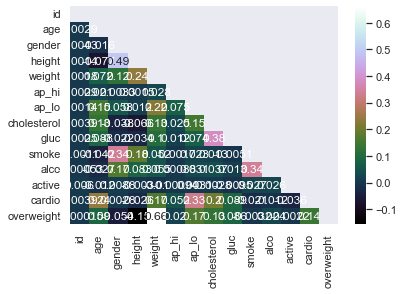

In [216]:
# the heatmap
mask = np.triu(np.ones_like(filtered_data_corr))
sns.heatmap(filtered_data_corr, mask=mask, annot=True, cmap='cubehelix')